# Golden Project - Uber Data Analysis

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import the dataset using the pandas library

In [3]:
df = pd.read_csv("UberDataset.csv")
df.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.shape


(1156, 7)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Data Preprocessing

In [8]:
df['PURPOSE'].fillna("NOT", inplace=True)


In [10]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors='coerce')


In [11]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

#changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],bins = [0,10,15,19,24],labels = ['Morning','Afternoon','Evening','Night'])


In [12]:
df.dropna(inplace=True)


In [13]:
df.drop_duplicates(inplace=True)


## Data Visualization

In [16]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = df[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

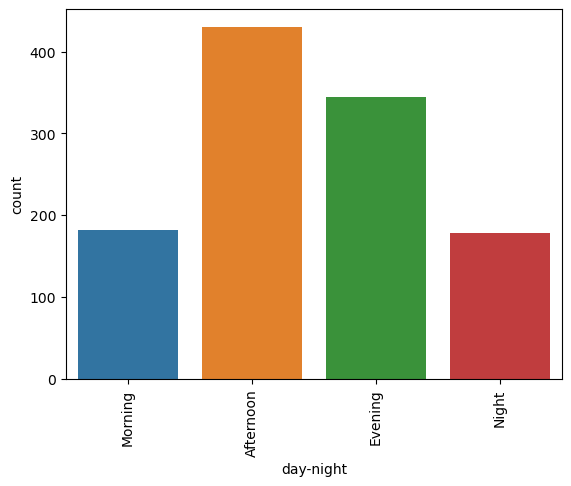

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='day-night')
plt.xticks(rotation=90)
plt.show()


#### Comparing the two different categories along with the PURPOSE of the user

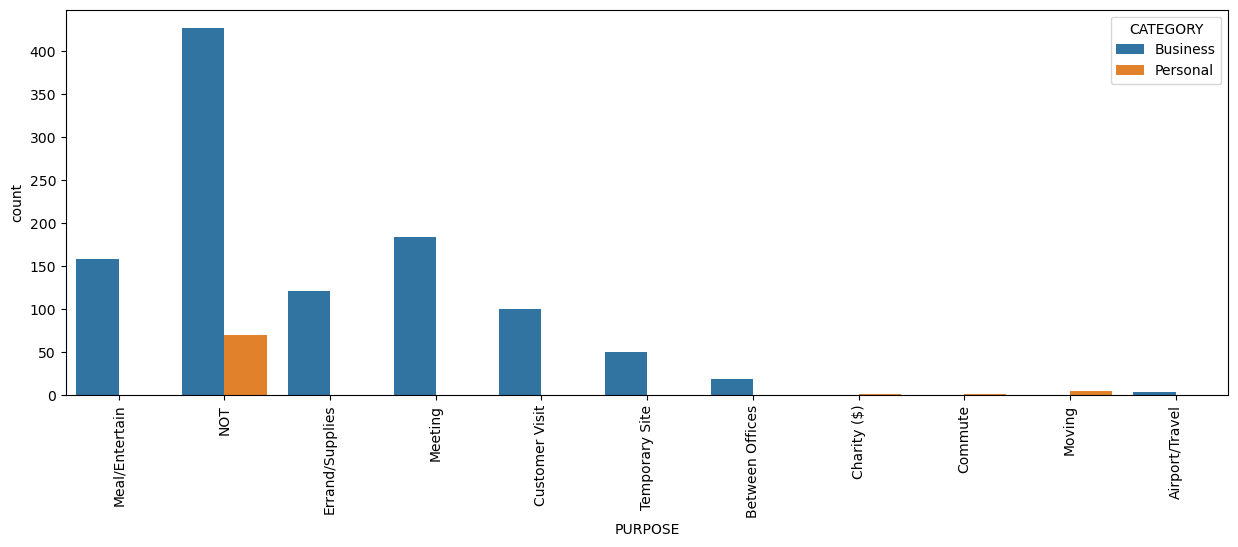

In [25]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()


In [31]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False)
object_cols = df.select_dtypes(include=['object']).columns.tolist()
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
feature_names = OH_encoder.get_feature_names_out(input_features=object_cols)
OH_cols.columns = feature_names
df_final = df.drop(object_cols, axis=1)
df = pd.concat([df_final, OH_cols], axis=1)


C:\Users\pavit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


C:\Users\pavit\AppData\Local\Temp\ipykernel_18920\2131267297.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

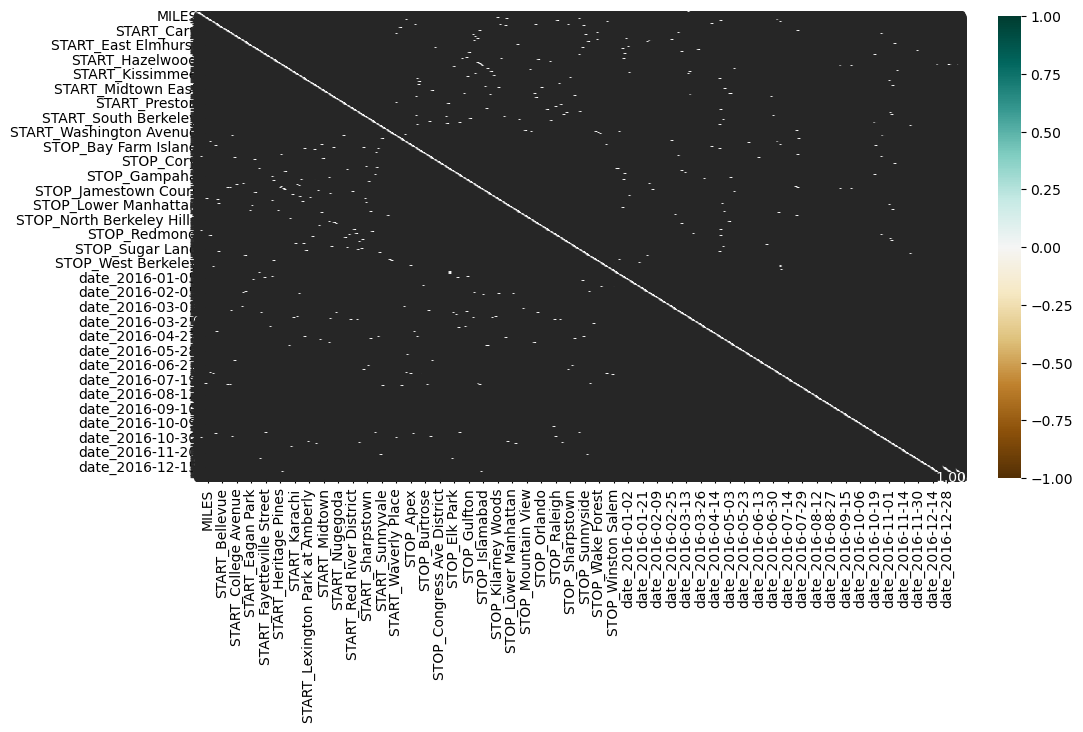

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

